# Decision Tree for the Loans Dataset
We are now going to compare decision trees and logistic regression over the usual loan dataset.

In [1]:
# general-purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-Learn
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score,auc


# libraries needed to plot decision trees
import io
import pydot
from scipy import misc
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

We also define a function we will use to export decision trees as images

Next, we load the dataset and define the input and output variables.

In [2]:
loans = pd.read_csv('LoansNumerical.csv')
target = 'safe_loans'
variables = loans.columns[loans.columns!=target]

x = loans[variables]
y = loans[target] 

First, we apply decision trees with entropy and gini measures.

In [3]:
dt_gini = tree.DecisionTreeClassifier(max_depth=10)
dt_gini = dt_gini.fit(x,y)
xval_gini = model_selection.cross_val_score(dt_gini, x, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print("Decision Tree (Gini)    Accuracy = %3.2f +/- %.4f" %(np.average(xval_gini),np.std(xval_gini)))

Decision Tree (Gini)    Accuracy = 0.82 +/- 0.0029


In [4]:
dt_entropy = tree.DecisionTreeClassifier('entropy',max_depth=10)
dt_entropy = dt_gini.fit(x,y)
xval_entropy = model_selection.cross_val_score(dt_entropy, x, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print("Decision Tree (Entropy) Accuracy = %3.2f +/- %.4f" %(np.average(xval_entropy),np.std(xval_entropy)))

Decision Tree (Entropy) Accuracy = 0.82 +/- 0.0029


In [5]:
lr = linear_model.LogisticRegression()
lr = lr.fit(x,y)
xval_lr = model_selection.cross_val_score(lr, x, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print("Logistic Regression     Accuracy = %3.2f +/- %.4f" %(np.average(xval_lr),np.std(xval_lr)))

Logistic Regression     Accuracy = 0.81 +/- 0.0018


Let's plot the decision tree for the one-hot-encoding and for the numerical encoding.

## Comparison Using ROC Curves


In [6]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size=0.33, random_state=42)

dt_gini = tree.DecisionTreeClassifier(max_depth=10);
dt_gini = dt_gini.fit(train_x, train_y)
dt_gini_prob = dt_gini.predict_proba(test_x)

dt_entropy = tree.DecisionTreeClassifier('entropy',max_depth=10);
dt_entropy = dt_entropy.fit(train_x, train_y)
dt_entropy_prob = dt_entropy.predict_proba(test_x)

lr = linear_model.LogisticRegression()
lr = lr.fit(train_x,train_y)
lr_prob = lr.predict_proba(test_x)

fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_true=test_y, y_score = dt_gini_prob[:,1], pos_label=1)
fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_true=test_y, y_score = dt_entropy_prob[:,1], pos_label=1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true=test_y, y_score = lr_prob[:,1], pos_label=1)

roc_auc_gini = roc_auc_score(y_true=test_y, y_score = dt_gini_prob[:,1])
roc_auc_entropy = roc_auc_score(y_true=test_y, y_score = dt_entropy_prob[:,1])
roc_auc_lr = roc_auc_score(y_true=test_y, y_score = lr_prob[:,1])

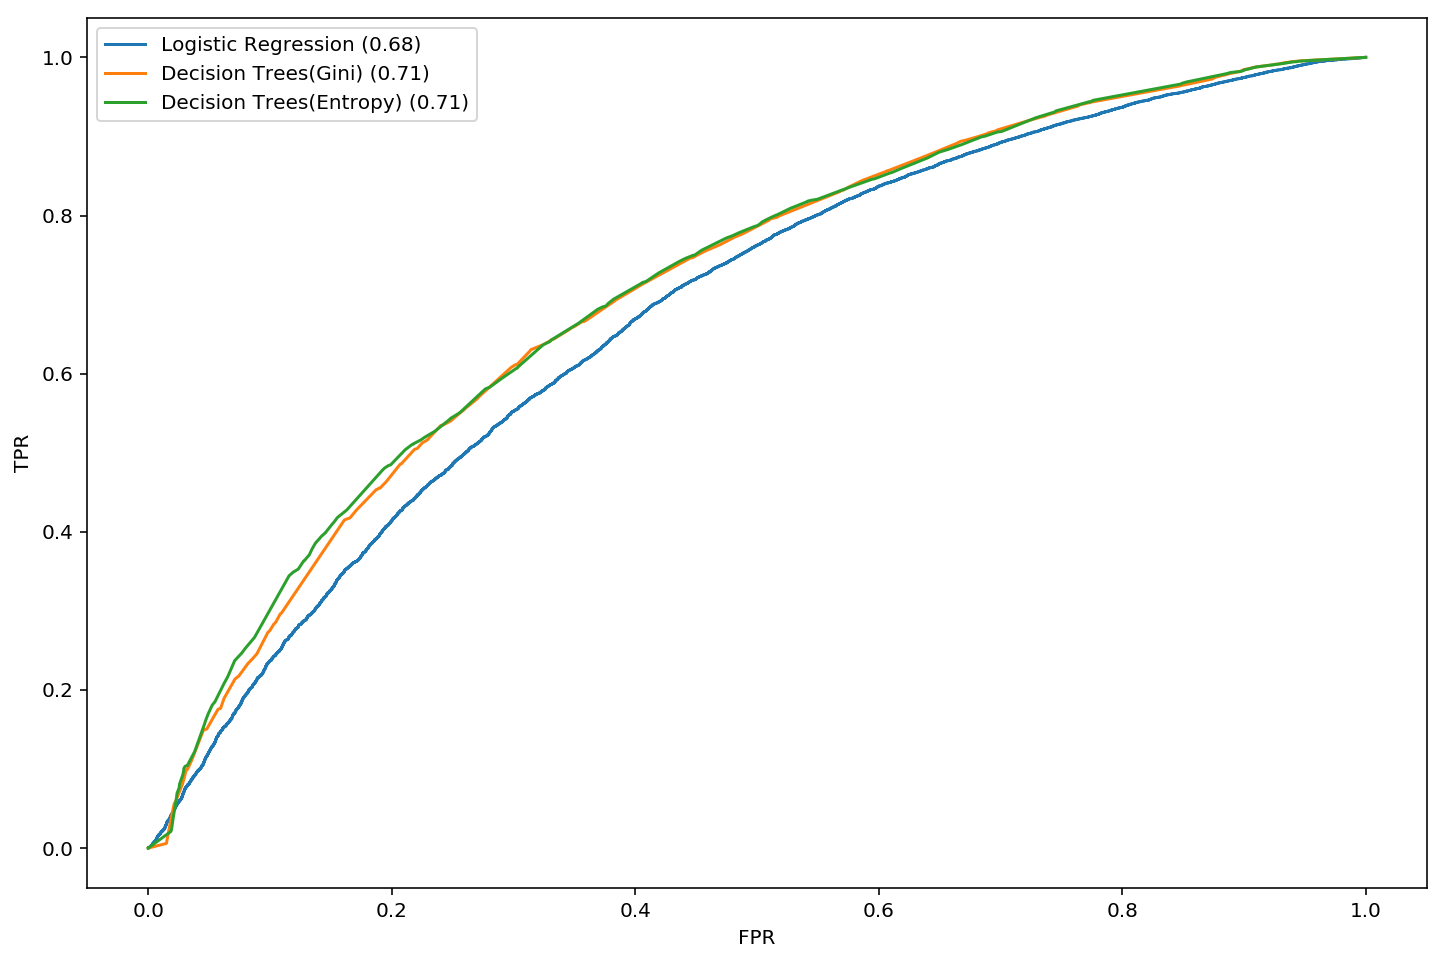

In [7]:
plt.figure(1, figsize=(12, 8));

plt.xlabel('FPR');
plt.ylabel('TPR');
plt.plot(fpr_lr,tpr_lr,label='Logistic Regression (%3.2f)'%roc_auc_lr)
plt.plot(fpr_gini,tpr_gini,label='Decision Trees(Gini) (%3.2f)'%roc_auc_gini)
plt.plot(fpr_entropy,tpr_entropy,label='Decision Trees(Entropy) (%3.2f)'%roc_auc_entropy)
plt.yticks(np.arange(0.0,1.01,.2))
plt.legend()
plt.show();